In [1]:
from PIL import Image
import os, glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print("라이브러리 import 완료!")

라이브러리 import 완료!


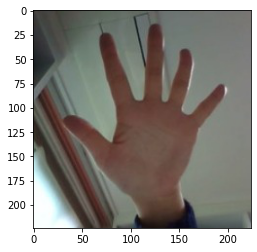

In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/"
image_pil = Image.open(image_dir_path + "1.jpg")  # 이미지 열기
image = np.array(image_pil)

plt.imshow(image)  # 이미지 보기 
plt.show()

In [7]:
image.shape  # 이미지 크기 확인

(224, 224, 3)

In [8]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [9]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [11]:
def load_data(img_path, number_of_data=3180):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (3180, 28, 28, 3)
y_train shape: (3180,)


라벨:  0


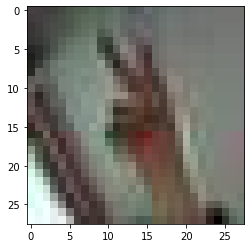

In [12]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [13]:
import tensorflow as tf
from tensorflow import keras

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [14]:
epochs = 20
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=epochs)

Epoch 1/20
100/100 [==============================] - 5s 17ms/step - loss: 1.9226 - accuracy: 0.9095
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.9667
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9928
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9990
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 7.8786e-04 - accuracy: 1.0000
Epoch 8/20
100/100 [==============================] - 0s 3ms/step - loss: 4.9289e-04 - accuracy: 1.0000
Epoch 9/20
100/100 [==============================] - 0s 3ms/step - loss: 6.1533e-04 - accuracy: 1.0000
Epoch 10/20
100/100 [==============================] - 0s 3ms/step - loss: 3.0259e-04 -

In [15]:
 
def load_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

print("슝~")

슝~


In [16]:
# resize_images 에서 다소 시간이 걸릴 수 있습니다

test_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/data/test/"   # 테스트 데이터 경로 설정 

resize_images(os.path.join(test_dir_path, "rock"))
resize_images(os.path.join(test_dir_path, "scissor"))
resize_images(os.path.join(test_dir_path, "paper"))

(x_test, y_test)=load_test(test_dir_path)  # 테스트 데이터 불러오기 
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [17]:
model.evaluate(x_test_norm, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.0924 - accuracy: 0.4133


[1.0924280881881714, 0.41333332657814026]